In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Package Loaded")

Package Loaded



Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (1, 20)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (1, 20))


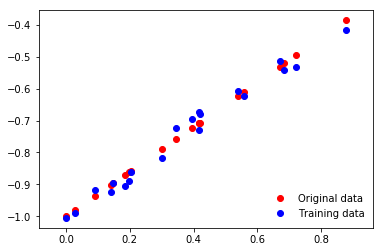

In [2]:
np.random.seed(1)
def f(x, a, b):
    n = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n = 20
noise_var = 0.001
train_X = np.random.random((1, n))
ref_Y = f(train_X, Wref, bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)
n_samples = train_X.size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)

plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [3]:
temp_X = np.insert(train_X, 0, 1, axis=0).T
temp_Y = train_Y.T
W = np.random.random((2, 1))

def h(X, w):
    return np.dot(X, w)

def costF(X, w, Y):
    #sqrErrors = np.power(h(X, w) - Y, 2)
    #return np.sum(sqrErrors) / (2*n_samples)    
    return float(np.dot((h(X, w) - Y).T, (h(X, w) - Y)) / (2*n_samples))

def gradientDescent(X, Y, w, alpha, num_iters):
    for i in xrange(num_iters):
        #w[0] -= np.sum(np.multiply(h(X, w) - Y, X[:,0].reshape(n_samples, 1))) * alpha / n_samples
        #w[1] -= np.sum(np.multiply(h(X, w) - Y, X[:,1].reshape(n_samples, 1))) * alpha / n_samples
        for j in xrange(w.size):
            w[j] -= np.sum(np.multiply(h(X, w) - Y, np.array(X[:,j].reshape(n_samples, 1)))) * alpha / n_samples
        if i % 1000 == 0:
            print i, w.T, costF(X, w, Y)
    return w

finalW = gradientDescent(temp_X, temp_Y, W, 0.01, 20000)
print finalW.T

0 [[ 0.47899852  0.04916472]] 0.78535904418
1000 [[-0.75646486  0.06187009]] 0.0120069468894
2000 [[-0.85454873  0.31517491]] 0.00447825212355
3000 [[-0.91322068  0.46671693]] 0.00178371489508
4000 [[-0.94832114  0.55737686]] 0.000819333588929
5000 [[-0.96931997  0.61161411]] 0.000474179217404
6000 [[-0.98188251  0.64406152]] 0.000350647643924
7000 [[-0.98939804  0.66347316]] 0.000306435398896
8000 [[-0.9938942   0.67508616]] 0.000290611730862
9000 [[-0.99658403  0.68203363]] 0.0002849484023
10000 [[-0.99819322  0.68618996]] 0.000282921483489
11000 [[-0.99915591  0.68867647]] 0.000282196044408
12000 [[-0.99973184  0.69016403]] 0.00028193640803
13000 [[-1.00007639  0.69105396]] 0.00028184348355
14000 [[-1.00028252  0.69158636]] 0.000281810225657
15000 [[-1.00040584  0.69190487]] 0.000281798322577
16000 [[-1.00047961  0.69209542]] 0.000281794062437
17000 [[-1.00052375  0.69220941]] 0.000281792537722
18000 [[-1.00055015  0.69227761]] 0.000281791992024
19000 [[-1.00056595  0.69231841]] 0.0

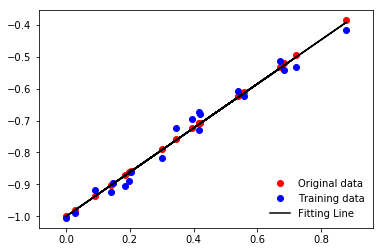

In [4]:
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], h(temp_X, W).T[0, :], 'k', label='Fitting Line')
plt.axis('equal')
plt.legend(loc='lower right')